# Загрузка набора данных

In [ ]:
import numpy as np
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

# Seed для повторяемости результатов
np.random.seed(42)

# Загрузка данных
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Нормализация данных

Вычитаем среднее значение и делим на стандартное отклонение

In [ ]:
# Среднее значение
mean = x_train.mean(axis=0)
# Стандартное отклонение
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

# Создаем сеть
Выходной слой с одним линейным нейроном - для задачи регрессии функция активации не используется.

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Обучение сети

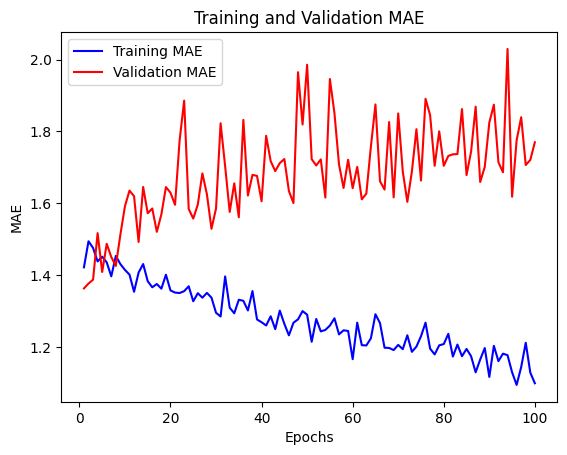

In [ ]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0, validation_split=0.2)

# Получение истории обучения
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

# Построение графика
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Оценка точности работы сети

In [ ]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print("Средняя абсолютная ошибка (тысяч долларов):", mae)

Средняя абсолютная ошибка (тысяч долларов): 2.393442153930664


# Использование сети для предсказания цен недвижимости

In [ ]:
predictions = model.predict(x_test)
print("Предсказанная стоимость:", pred[1][0], ", правильная стоимость:", y_test[1])
print("Предсказанная стоимость:", pred[50][0], ", правильная стоимость:", y_test[50])
print("Предсказанная стоимость:", pred[100][0], ", правильная стоимость:", y_test[100])

# Сравнение предсказанных значений с настоящими значениями
for i in range(len(predictions)):
    print(f"Настоящее значение: {y_test[i]}, Предсказанное значение: {predictions[i][0]}")

4/4 [==============================] - 0s 3ms/step
Предсказанная стоимость: 17.936516 , правильная стоимость: 18.8
Предсказанная стоимость: 32.17312 , правильная стоимость: 35.4
Предсказанная стоимость: 29.003082 , правильная стоимость: 26.7
Настоящее значение: 7.2, Предсказанное значение: 8.6238374710083
Настоящее значение: 18.8, Предсказанное значение: 18.31395149230957
Настоящее значение: 19.0, Предсказанное значение: 21.683984756469727
Настоящее значение: 27.0, Предсказанное значение: 33.026710510253906
Настоящее значение: 22.2, Предсказанное значение: 24.60702133178711
Настоящее значение: 24.5, Предсказанное значение: 22.708810806274414
Настоящее значение: 31.2, Предсказанное значение: 27.72399139404297
Настоящее значение: 22.9, Предсказанное значение: 21.9140567779541
Настоящее значение: 20.5, Предсказанное значение: 19.669281005859375
Настоящее значение: 23.2, Предсказанное значение: 20.463973999023438
Настоящее значение: 18.6, Предсказанное значение: 19.859521865844727
Настояще

# График зависимости ошибки (mae) от эпохи

In [ ]:
# Получение значений ошибки (MAE) на обучающем и тестовом наборах
train_mae = history.history['mae']
test_mae = history.history['val_mae']

# Построение графика зависимости MAE от эпохи
epochs = range(1, len(train_mae) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mae, 'b', label='Обучающий набор MAE')
plt.plot(epochs, test_mae, 'r', label='Тестовый набор MAE')
plt.title('Зависимость ошибки (mae) от эпохи ')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка (mae)')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'val_mae'

# График линейной регрессии

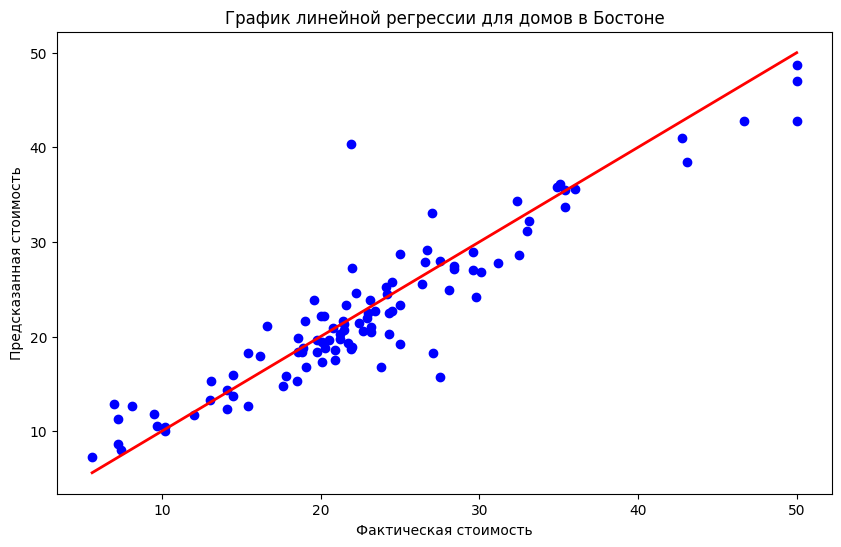

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Фактическая стоимость')
plt.ylabel('Предсказанная стоимость')
plt.title('График линейной регрессии для домов в Бостоне')
plt.show()

# Гистограмма распределения ошибок предсказания

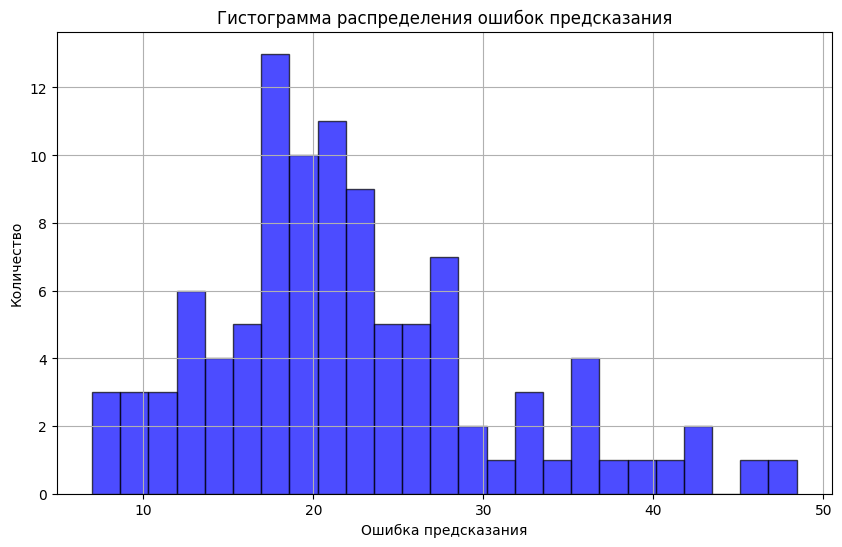

In [ ]:
y_test = np.array([0.3])

# Расчет ошибок
errors = predictions.flatten() - y_test

# Построение гистограммы ошибок
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Количество')
plt.title('Гистограмма распределения ошибок предсказания')
plt.grid(True)
plt.show()